In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix,roc_curve

In [30]:
from sklearn.metrics import classification_report

In [440]:
import numpy as np

In [2]:
df = pd.read_csv('features_builtagain.csv')

In [3]:
df.head()

,Unnamed: 0,question_cleaned,answer_cleaned,score,cos_sim,kl_lm,kl_bilm,Question,Answer,score.1,tf_cos,bitf_cos
0,0,"['please', 'describe', 'size', 'organization',...","['clifford', 'chance', 'employ', 'people', 'gl...",1.0,0.854894,5.285982,64.202174,1) Please describe \n- the size of the organiz...,"Clifford Chance employs 6000 people globally, ...",1.0,0.501280,0.386402
1,1,"['please', 'provide', 'clear', 'explanation', ...","['clifford', 'chance', 'professional', 'legal'...",1.0,0.776172,10.015840,65.480876,2) Please provide a clear explanation of what ...,Clifford Chance is a professional legal servic...,1.0,0.150214,0.142820
2,2,"['office', 'upper', 'bank', 'street', 'london'...","['citi', 'data', 'handle', 'aforementioned', '...",1.0,0.933298,10.666567,161.406301,"3) Are this office at 10 UPPER BANK STREET, LO...",Citi data is only handled at the aforementione...,1.0,0.132728,0.111041
3,3,"['specify', 'quantity', 'describe', 'number', ...","['record', 'quantity', 'determine', 'relations...",1.0,0.825581,10.341471,99.324364,\n4) Specify quantities that will describe the...,Record quantity is determined by the relations...,1.0,0.025402,0.008785
4,4,"['one', 'sub', 'contractor', 'use', 'provide',...","['sub', 'contractor', 'use', 'conjunction', 's...",1.0,0.950958,7.693669,52.343010,5) If one or more sub-contractors are used in ...,Sub-contractors are not used in conjunction wi...,1.0,0.407989,0.390201


In [4]:
from sklearn.utils import resample

In [5]:
train = resample(df, random_state = 0)

In [6]:
train.describe()

,Unnamed: 0,score,cos_sim,kl_lm,kl_bilm,score.1,tf_cos,bitf_cos
count,4232.000000,4232.000000,4232.000000,4232.000000,4232.000000,4232.000000,4232.000000,4232.000000
mean,2110.115312,0.502836,0.729970,12.496850,117.318375,0.502836,0.077440,0.064260
std,1217.928645,0.500051,0.182173,4.262333,97.383323,0.500051,0.124442,0.111638
min,0.000000,0.000000,0.000000,0.077164,0.213320,0.000000,0.000000,0.000000
25%,1055.750000,0.000000,0.643291,10.355369,61.788162,0.000000,0.000000,0.000000
50%,2099.000000,1.000000,0.766599,12.023751,91.209282,1.000000,0.027722,0.021480
75%,3173.250000,1.000000,0.858915,14.092769,145.018774,1.000000,0.100634,0.083721
max,4229.000000,1.000000,1.000000,58.557448,1211.408114,1.000000,1.000000,1.000000


In [7]:
df.describe()

,Unnamed: 0,score,cos_sim,kl_lm,kl_bilm,score.1,tf_cos,bitf_cos
count,4232.000000,4232.000000,4232.000000,4232.000000,4232.000000,4232.000000,4232.000000,4232.000000
mean,2115.500000,0.500000,0.729099,12.513722,116.150025,0.500000,0.075216,0.061970
std,1221.817499,0.500059,0.181422,4.130766,93.638765,0.500059,0.119541,0.106670
min,0.000000,0.000000,0.000000,-0.026829,-0.173549,0.000000,0.000000,0.000000
25%,1057.750000,0.000000,0.645242,10.390008,60.644444,0.000000,0.000000,0.000000
50%,2115.500000,0.500000,0.764950,12.023751,90.487180,0.500000,0.027168,0.020709
75%,3173.250000,1.000000,0.857018,14.060121,145.861258,1.000000,0.101362,0.081911
max,4231.000000,1.000000,1.000000,58.557448,1211.408114,1.000000,1.000000,1.000000


In [8]:
test = df.copy()

In [9]:
test = test.append(train).drop_duplicates(keep=False)

In [10]:
test.head()

,Unnamed: 0,question_cleaned,answer_cleaned,score,cos_sim,kl_lm,kl_bilm,Question,Answer,score.1,tf_cos,bitf_cos
1,1,"['please', 'provide', 'clear', 'explanation', ...","['clifford', 'chance', 'professional', 'legal'...",1.0,0.776172,10.015840,65.480876,2) Please provide a clear explanation of what ...,Clifford Chance is a professional legal servic...,1.0,0.150214,0.142820
6,6,"['data', 'access', 'describe', 'access']","['data', 'access', 'use', 'standard', 'tool', ...",1.0,0.922579,5.971332,13.194141,"a) If data is accessed, describe how it is acc...",a.) Data is accessed using standard tools and ...,1.0,0.385117,0.304614
8,8,"['c', 'data', 'store', 'describe', 'store', 't...","['c', 'data', 'store', 'secure', 'server', 'wi...",1.0,0.832746,8.477222,26.565757,"c) If data is stored, describe how it is store...",c.) Data is stored on secure servers within a ...,1.0,0.179759,0.090027
9,9,"['describe', 'data', 'disposal', 'process']","['asset', 'information', 'disposal', 'cover', ...",1.0,0.826362,5.080876,13.646755,d) Describe the data disposal process.,d.) Asset and Information Disposal is covered ...,1.0,0.413959,0.295783
12,12,"['receive', 'citi', 'data', 'electronic', 'tra...","['email', 'recieved', 'citi', 'via', 'email', ...",1.0,0.579315,10.262056,79.163183,3) Do you receive Citi data on Electronic Tran...,3.) Email is recieved from Citi via email tran...,1.0,0.080855,0.092285


In [11]:
test.describe()

,Unnamed: 0,score,cos_sim,kl_lm,kl_bilm,score.1,tf_cos,bitf_cos
count,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000
mean,2137.638730,0.491429,0.726827,12.492019,113.080467,0.491429,0.072460,0.058832
std,1223.135558,0.500085,0.180514,3.926871,89.438222,0.500085,0.114721,0.100319
min,1.000000,0.000000,0.000000,-0.026829,-0.173549,0.000000,0.000000,0.000000
25%,1097.000000,0.000000,0.645144,10.418882,55.046879,0.000000,0.000000,0.000000
50%,2154.000000,0.000000,0.759356,12.034651,89.993481,0.000000,0.026494,0.019695
75%,3186.000000,1.000000,0.855373,13.892554,141.790010,1.000000,0.100739,0.076060
max,4231.000000,1.000000,0.999974,39.186298,789.004332,1.000000,0.966748,0.963097


In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lr = LinearRegression()

In [14]:
X = train[['cos_sim', 'kl_lm', 'kl_bilm', 'tf_cos', 'bitf_cos']]

In [15]:
X.head()

,cos_sim,kl_lm,kl_bilm,tf_cos,bitf_cos
2732,0.529081,17.984985,211.967140,0.002922,0.003558
2607,0.584579,12.716898,25.192032,0.000000,0.000000
1653,0.965463,9.440204,60.635024,0.107950,0.113352
3264,0.576348,14.765810,118.646478,0.010192,0.012237
1033,0.651971,12.773294,127.290867,0.000000,0.000000


In [16]:
y = train[['score']]

In [17]:
y.head()

,score
2732,0.0
2607,0.0
1653,1.0
3264,0.0
1033,1.0


In [18]:
lr.fit(X, y)

/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
X_test = test[['cos_sim', 'kl_lm', 'kl_bilm', 'tf_cos', 'bitf_cos']]

In [20]:
y_test = test[['score']]

In [21]:
pre = lr.predict(X_test)

In [22]:
pre

array([[ 0.63973891],
       [ 1.02183072],
       [ 0.7109833 ],
       ..., 
       [ 0.23865875],
       [ 0.45192648],
       [ 0.40196994]])

In [23]:
res = []
for i in pre:
    if i >= 0.5:
        res.append(1)
    else:
        res.append(0)

In [34]:
accuracy_score(y_test, res)

0.74158730158730157

In [35]:
print(classification_report(y_test, res))

             precision    recall  f1-score   support

        0.0       0.70      0.86      0.77       801
        1.0       0.81      0.62      0.70       774

avg / total       0.75      0.74      0.74      1575



In [29]:
precision_score(y_test, res)

0.81049069373942473

In [36]:
recall_score(y_test, res)

0.61886304909560719

In [37]:
f1_score(y_test, res)

0.70183150183150178

AUC: 0.739518915309


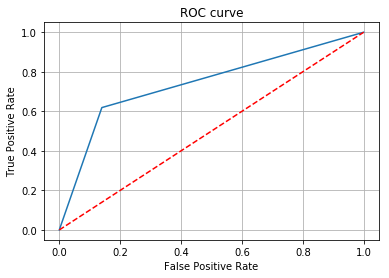

In [436]:
roc(y_test, res)

In [38]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,pre)

0.41883088449868505

In [39]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pre)

0.20089183585320169

In [40]:
from sklearn.metrics import r2_score
r2_score(y_test, pre)

0.19619643676452825

In [41]:
lr.coef_

array([[  4.61458109e-01,  -1.08807220e-02,  -5.37275296e-05,
          1.07032351e+00,   1.00703642e-01]])

In [42]:
lr.score(X_test, y_test)

0.19619643676452825

In [453]:
lr.feature_importances_

AttributeError: 'LinearRegression' object has no attribute 'feature_importances_'

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
lc = LogisticRegression()

In [45]:
lc.fit(X, y)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
lc.score(X_test, y_test)

0.73079365079365077

In [47]:
lc.predict(X_test)

array([ 1.,  1.,  1., ...,  0.,  0.,  0.])

In [48]:
lc.coef_

array([[  1.54128476e+00,  -5.12095711e-02,  -5.79276188e-04,
          5.75147123e+00,   6.61304916e+00]])

In [49]:
lc.predict_proba(X_test)

array([[ 0.19539948,  0.80460052],
       [ 0.01339555,  0.98660445],
       [ 0.19393664,  0.80606336],
       ..., 
       [ 0.78109358,  0.21890642],
       [ 0.57512532,  0.42487468],
       [ 0.63018608,  0.36981392]])

In [50]:
mean_squared_error(y_test, lc.predict_proba(X_test)[:,1])

0.18801372021168336

In [51]:
mean_absolute_error(y_test, lc.predict_proba(X_test)[:,1])

0.38505566702706479

In [52]:
accuracy_score(y_test, lc.predict(X_test))

0.73079365079365077

In [53]:
roc_auc_score(y_test, lc.predict(X_test))

0.7288636297651192

In [54]:
precision_score(y_test, lc.predict(X_test))

0.78973509933774833

In [55]:
recall_score(y_test, lc.predict(X_test))

0.61627906976744184

In [56]:
f1_score(y_test, lc.predict(X_test))

0.69230769230769229

In [57]:
import matplotlib.pyplot as plt

In [58]:
def roc(y_class, y_pred):
    fpr, tpr, thresh = roc_curve(y_class, y_pred)
    auc = roc_auc_score(y_class, y_pred)
    print("AUC:",auc)
    
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % auc)
    plt.plot([0,1], [0,1], 'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.grid(True)
    plt.show()

AUC: 0.728863629765


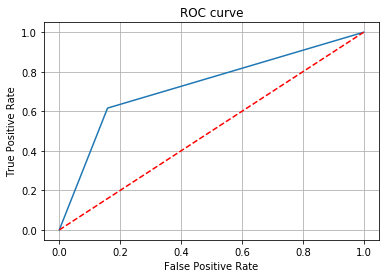

In [59]:
roc(y_test, lc.predict(X_test))

In [60]:
print(classification_report(y_test, lc.predict(X_test)))

             precision    recall  f1-score   support

        0.0       0.69      0.84      0.76       801
        1.0       0.79      0.62      0.69       774

avg / total       0.74      0.73      0.73      1575



In [419]:
mean_absolute_error(y_test, lc.predict_proba(X_test)[:,1])

0.38505566702706479

In [420]:
mean_squared_error(y_test, lc.predict_proba(X_test)[:,1])

0.18801372021168336

In [454]:
lc.feature_importances_

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

# Naive Bayes

In [61]:
from sklearn.naive_bayes import MultinomialNB

In [62]:
nb = MultinomialNB()

In [63]:
nb.fit(X, y)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [64]:
nb.score(X_test, y_test)

0.72063492063492063

In [65]:
accuracy_score(y_test, nb.predict(X_test))

0.72063492063492063

In [421]:
precision_score(y_test, nb.predict(X_test))

0.78595890410958902

In [423]:
recall_score(y_test, nb.predict(X_test))

0.59302325581395354

In [424]:
f1_score(y_test, nb.predict(X_test))

0.67599410898379975

In [425]:
print(classification_report(y_test, nb.predict(X_test)))

             precision    recall  f1-score   support

        0.0       0.68      0.84      0.75       801
        1.0       0.79      0.59      0.68       774

avg / total       0.73      0.72      0.72      1575



AUC: 0.718484162239


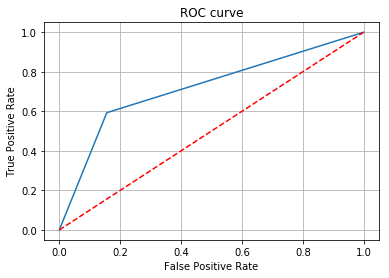

In [426]:
roc(y_test, nb.predict(X_test))

In [427]:
mean_absolute_error(y_test, nb.predict_proba(X_test)[:,1])

0.45016665617123519

In [428]:
mean_squared_error(y_test, nb.predict_proba(X_test)[:,1])

0.21160381169637524

In [455]:
nb.feature_importances_

AttributeError: 'MultinomialNB' object has no attribute 'feature_importances_'

# KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
knn = KNeighborsClassifier()

In [70]:
knn.fit(X, y)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [71]:
knn.score(X_test, y_test)

0.62158730158730158

In [72]:
accuracy_score(y_test, knn.predict(X_test))

0.62158730158730158

In [429]:
precision_score(y_test, knn.predict(X_test))

0.62464985994397759

In [430]:
recall_score(y_test, knn.predict(X_test))

0.57622739018087854

In [431]:
f1_score(y_test, knn.predict(X_test))

0.59946236559139787

In [432]:
print(classification_report(y_test, knn.predict(X_test)))

             precision    recall  f1-score   support

        0.0       0.62      0.67      0.64       801
        1.0       0.62      0.58      0.60       774

avg / total       0.62      0.62      0.62      1575



AUC: 0.620822808698


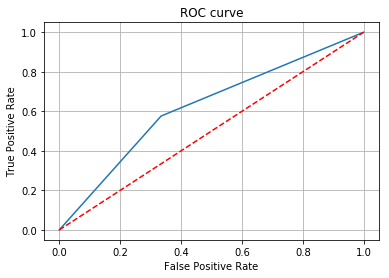

In [433]:
roc(y_test, knn.predict(X_test))

In [434]:
mean_absolute_error(y_test, knn.predict_proba(X_test)[:,1])

0.40088888888888896

In [435]:
mean_squared_error(y_test, knn.predict_proba(X_test)[:,1])

0.2684698412698413

In [456]:
knn.feature_importances_

AttributeError: 'KNeighborsClassifier' object has no attribute 'feature_importances_'

# SVM

In [75]:
from sklearn.svm import SVC

In [88]:
svc =SVC(kernel = 'linear', probability=True)

In [89]:
y = y.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [90]:
svc.fit(X, y.reshape(4232, ))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [91]:
svc.score(X_test, y_test)

0.73777777777777775

In [92]:
accuracy_score(y_test, svc.predict(X_test))

0.73777777777777775

In [93]:
precision_score(y_test, svc.predict(X_test))

0.86317907444668007

In [94]:
recall_score(y_test, svc.predict(X_test))

0.55426356589147285

In [95]:
f1_score(y_test, svc.predict(X_test))

0.67505900865460255

In [96]:
print(classification_report(y_test, svc.predict(X_test)))

             precision    recall  f1-score   support

        0.0       0.68      0.92      0.78       801
        1.0       0.86      0.55      0.68       774

avg / total       0.77      0.74      0.73      1575



AUC: 0.734684841622


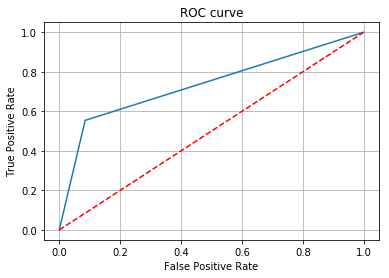

In [97]:
roc(y_test, svc.predict(X_test))

In [103]:
mean_absolute_error(y_test, svc.predict_proba(X_test)[:,1])

0.37712092054484164

In [104]:
mean_squared_error(y_test, svc.predict_proba(X_test)[:,1])

0.18886887741000807

In [105]:
confusion_matrix(y_test, svc.predict(X_test))

array([[733,  68],
       [345, 429]])

In [458]:
svc.feature_importances_

AttributeError: 'SVC' object has no attribute 'feature_importances_'

#### decision tree

In [106]:
from sklearn.tree import DecisionTreeClassifier

In [147]:
dt = DecisionTreeClassifier(max_depth = 4)

In [148]:
dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [149]:
dt.score(X_test, y_test)

0.73142857142857143

In [150]:
dt.score(X, y)

0.76654064272211719

In [151]:
accuracy_score(y_test, dt.predict(X_test))

0.73142857142857143

In [152]:
precision_score(y_test, dt.predict(X_test))

0.81395348837209303

In [153]:
recall_score(y_test, dt.predict(X_test))

0.58785529715762275

In [154]:
f1_score(y_test, dt.predict(X_test))

0.68267066766691664

In [84]:
print(classification_report(y_test, dt.predict(X_test)))

             precision    recall  f1-score   support

        0.0       0.69      0.85      0.76       801
        1.0       0.79      0.60      0.68       774

avg / total       0.74      0.73      0.72      1575



AUC: 0.725503004965


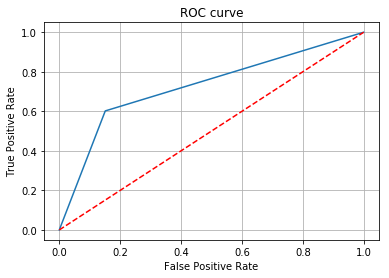

In [85]:
roc(y_test, dt.predict(X_test))

In [155]:
mean_absolute_error(y_test, dt.predict_proba(X_test)[:,1])

0.33644221008004416

In [156]:
mean_squared_error(y_test, dt.predict_proba(X_test)[:,1])

0.17621353761443811

In [437]:
importances = dt.feature_importances_

In [438]:
importances

array([ 0.16094037,  0.01738693,  0.        ,  0.01812876,  0.80354394])

In [441]:
std = np.std([tree.feature_importances_ for tree in dt.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]


AttributeError: 'DecisionTreeClassifier' object has no attribute 'estimators_'

# random forest

In [157]:
from sklearn.ensemble import RandomForestClassifier

In [313]:
rf = RandomForestClassifier(max_depth = 6)

In [314]:
rf.fit(X, y)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [315]:
rf.score(X_test, y_test)

0.74476190476190474

In [316]:
rf.score(X, y)

0.79465973534971646

In [317]:
accuracy_score(y_test, rf.predict(X_test))

0.74476190476190474

In [318]:
precision_score(y_test, rf.predict(X_test))

0.81000000000000005

In [319]:
recall_score(y_test, rf.predict(X_test))

0.62790697674418605

In [320]:
f1_score(y_test, rf.predict(X_test))

0.70742358078602618

In [321]:
print(classification_report(y_test, rf.predict(X_test)))

             precision    recall  f1-score   support

        0.0       0.70      0.86      0.77       801
        1.0       0.81      0.63      0.71       774

avg / total       0.76      0.74      0.74      1575



AUC: 0.742792439683


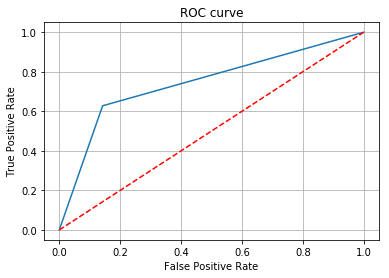

In [322]:
roc(y_test, rf.predict(X_test))

In [323]:
mean_absolute_error(y_test, rf.predict_proba(X_test)[:,1])

0.33031502298666188

In [324]:
mean_squared_error(y_test, rf.predict_proba(X_test)[:,1])

0.16600553767513249

In [442]:
importances = rf.feature_importances_

In [443]:
importances

array([ 0.26403366,  0.12564262,  0.04468479,  0.29213295,  0.27350597])

In [444]:
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [445]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


Feature ranking:
1. feature 3 (0.292133)
2. feature 4 (0.273506)
3. feature 0 (0.264034)
4. feature 1 (0.125643)
5. feature 2 (0.044685)


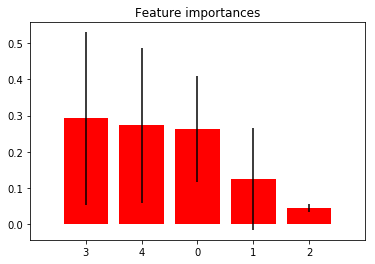

In [446]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# GBDT

In [366]:
from sklearn.ensemble import GradientBoostingClassifier

In [407]:
gbdt = GradientBoostingClassifier(max_depth = 2)

In [408]:
gbdt.fit(X, y)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [409]:
gbdt.score(X_test, y_test)

0.75111111111111106

In [410]:
gbdt.score(X, y)

0.77811909262759926

In [411]:
accuracy_score(y_test, gbdt.predict(X_test))

0.75111111111111106

In [412]:
precision_score(y_test, gbdt.predict(X_test))

0.80608974358974361

In [413]:
recall_score(y_test, gbdt.predict(X_test))

0.64987080103359174

In [414]:
f1_score(y_test, gbdt.predict(X_test))

0.71959942775393415

In [415]:
print(classification_report(y_test, gbdt.predict(X_test)))

             precision    recall  f1-score   support

        0.0       0.72      0.85      0.78       801
        1.0       0.81      0.65      0.72       774

avg / total       0.76      0.75      0.75      1575



AUC: 0.74940481375


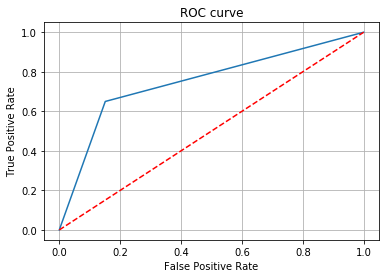

In [416]:
roc(y_test, gbdt.predict(X_test))

In [417]:
mean_absolute_error(y_test, gbdt.predict_proba(X_test)[:,1])

0.33004805252019548

In [418]:
mean_squared_error(y_test, gbdt.predict_proba(X_test)[:,1])

0.16434804869024858

In [448]:
importances = gbdt.feature_importances_

In [449]:
importances

array([ 0.32218898,  0.1280302 ,  0.1268015 ,  0.17744176,  0.24553756])

In [450]:
std = np.std([tree.feature_importances_ for tree in gbdt.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

AttributeError: 'numpy.ndarray' object has no attribute 'feature_importances_'

# xgboost

In [325]:
import xgboost as xgb

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [354]:
xgb_model = xgb.XGBClassifier(max_depth = 4)

In [355]:
xgb_model.fit(X, y)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [356]:
xgb_model.score(X_test, y_test)

0.74349206349206354

In [357]:
xgb_model.score(X, y)

0.81498109640831762

In [358]:
accuracy_score(y_test, xgb_model.predict(X_test))

0.74349206349206354

In [359]:
precision_score(y_test, xgb_model.predict(X_test))

0.79458598726114649

In [360]:
recall_score(y_test, xgb_model.predict(X_test))

0.64470284237726094

In [361]:
f1_score(y_test, xgb_model.predict(X_test))

0.71184022824536375

In [362]:
print(classification_report(y_test, xgb_model.predict(X_test)))

             precision    recall  f1-score   support

        0.0       0.71      0.84      0.77       801
        1.0       0.79      0.64      0.71       774

avg / total       0.75      0.74      0.74      1575



AUC: 0.741827076619


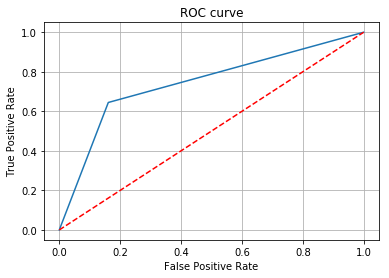

In [363]:
roc(y_test, xgb_model.predict(X_test))

In [364]:
mean_absolute_error(y_test, xgb_model.predict_proba(X_test)[:,1])

0.32547067617021858

In [365]:
mean_squared_error(y_test, xgb_model.predict_proba(X_test)[:,1])

0.16900802863613507

In [451]:
xgb_model.feature_importances_

array([ 0.28531337,  0.21796072,  0.16557531,  0.18054256,  0.15060805], dtype=float32)

In [452]:
std = np.std([tree.feature_importances_ for tree in xgb_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

AttributeError: 'XGBClassifier' object has no attribute 'estimators_'